Open Loop Simulation

In [8]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

SIM_DIR = "out/sim"
CSV_OUTPUT = f"{SIM_DIR}/measurement.ChannelGroup_0_linear.csv"
SIMER_IMAGE = "ghcr.io/boschglobal/dse-simer:latest"
MDF_FILE = "measurement.mf4"


Notebook Controller

In [9]:
import os
from asammdf import MDF

def run_command(cmd):
    cmd_str = ' '.join(cmd)
    print(f"Running: {cmd_str}")
    result = os.system(cmd_str)
    if result != 0:
        raise RuntimeError(f"Command failed: {cmd_str}")
    print(f"Command executed successfully.")

def run_simulation():
    os.environ["TASK_X_REMOTE_TASKFILES"] = "1"
    os.environ["SIMER_IMAGE"] = SIMER_IMAGE

    # Build task
    run_command(["task", "-y", "build"])

    # Run simulation
    sim_cmd = [
        "docker", "run", "--rm",
        "-v", f"{os.getcwd()}/out/sim:/sim", SIMER_IMAGE,
        "-env", f"linear:MEASUREMENT_FILE=/sim/{MDF_FILE}",
        "-stepsize", "0.0005", "-endtime", "0.005"
    ]
    run_command(sim_cmd)
    print("Simulation complete.")

    # Convert MDF to CSV
    convert_to_csv(SIM_DIR, MDF_FILE, CSV_OUTPUT)
    print(f"Converted MDF to CSV: {CSV_OUTPUT}")

def convert_to_csv(sim_dir, mdf_file, csv_output):
    #Convert MDF file to CSV using asammdf
    in_file = os.path.join(sim_dir, mdf_file)
    out_file = csv_output
    mdf = MDF(in_file)
    mdf.export(fmt="csv", filename=out_file)

Run the Simulation

In [10]:
try:
    run_simulation()
    print("Simulation executed successfully.")
except Exception as e:
    print(f"Error in simulation: {e}")


Running: task -y build


task: Task "dse:download-file:https://github.com/boschglobal/dse.modelc/releases/download/v2.1.15/ModelC-2.1.15-linux-amd64.zip-downloads/ModelC-2.1.15-linux-amd64.zip" is up to date
task: Task "sim:model:input" is up to date
task: Task "dse:download-file:https://github.com/boschglobal/dse.fmi/releases/download/v1.1.15/Fmi-1.1.15-linux-amd64.zip-downloads/Fmi-1.1.15-linux-amd64.zip" is up to date
task: Task "dse:fmu-fetch-extract:https://github.com/boschglobal/dse.fmi/releases/download/v1.1.15/Fmi-1.1.15-linux-amd64.zip-Fmi-1.1.15-linux-amd64/examples/fmu/linear/fmi2/linear.fmu-sim/model/linear/fmu" is up to date
task: Task "sim:model:linear" is up to date
task: Task "build" is up to date


Command executed successfully.
Running: docker run --rm -v /home/kki8kor/dse.sdp/examples/openloop/out/sim:/sim ghcr.io/boschglobal/dse-simer:latest -env linear:MEASUREMENT_FILE=/sim/measurement.mf4 -stepsize 0.0005 -endtime 0.005
Version: 2.1.61) 
1) Load YAML File: data/simulation.yaml
2) Version: 2.1.6
2) Platform: linux-amd64
3) Version: 2.1.6
3) Platform: linux-amd64
3) Time: 2025-00-15 13:28:02 (UTC)
3) Host: 96df0d15d1a9
3) CWD: /sim
3) Load YAML File: data/simulation.yaml
2) Time: 2025-00-15 13:28:02 (UTC)
2) Host: 96df0d15d1a9
2) CWD: /sim
2) Load YAML File: data/simulation.yaml
2) Load YAML File: model/input/data/model.yaml
2) Load YAML File: model/input/data/signalgroup.yaml
3) Load YAML File: model/linear/data/model.yaml
3) Load YAML File: model/linear/data/signalgroup.yaml
3) Simulation Parameters:
3)   Step Size: 0.000500
3)   End Time: 0.005000
3)   Model Timeout: 60.000000
3)   Sim Path: (null)
3) Transport:
3)   Transport: redispubsub
3)   URI: redis://localhost:6379
3

Load and Visualize Results

Simulation Results Loaded.


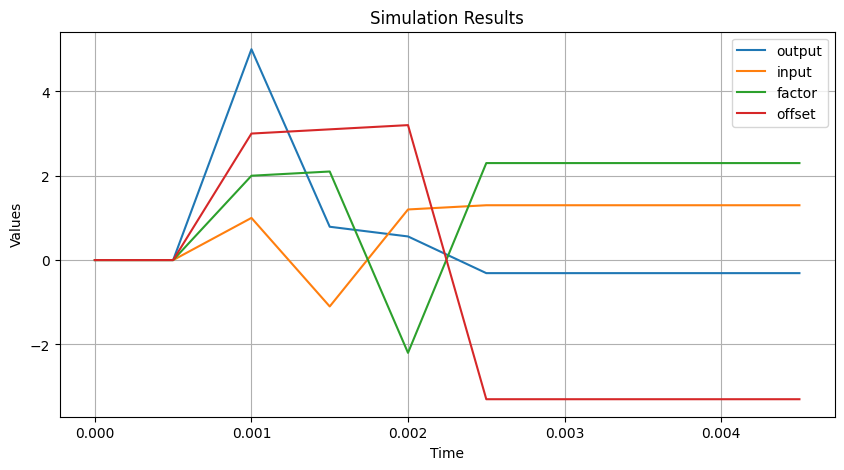

In [11]:
# Load CSV
if Path(CSV_OUTPUT).exists():
    results = pd.read_csv(CSV_OUTPUT)
    print("Simulation Results Loaded.")
else:
    raise FileNotFoundError(f"Output file not found: {CSV_OUTPUT}")

# Plot results
plt.figure(figsize=(10, 5))
for col in results.columns[1:]:
    plt.plot(results['timestamps'], results[col], label=col)

plt.title("Simulation Results")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

